In [3]:
%load_ext autoreload
%autoreload 2
#%matplotlib nbagg
from Object_detection_features import *
import gym
from gym import wrappers
from importlib import reload
from skimage.transform import resize
from skimage.color import rgb2gray

% matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#env = gym.make('MsPacman-v0')
env = gym.make('Skiing-v0')
# Самая долгая часть. Считается один раз. В конструкторе находятся все классы объектов и фон
odf = ObjectDetectionFeatures2(env)

[2017-02-07 17:29:58,020] Making new env: Skiing-v0


In [8]:
max_observations = 1000
sample_observations = []
sample_simplified = []
render = False
count = 0

#env_name = 'MsPacman-v0'
env_name = 'Skiing-v0'
env = gym.make(env_name)

while True:
    if len(sample_observations) >= max_observations: break
    s = env.reset()
    if count % 10 == 0:
        observation = env.ale.getScreenGrayscale()
        sample_simplified.append(observation)
        sample_observations.append(odf.get_simple_image(rgb2gray(observation[:, :, 0])))
    count += 1
    done = False

    while not done:
        if render: env.render()
        if len(sample_observations) >= max_observations: break
        a = env.action_space.sample()
        s, r, done, _ = env.step(a)
        if count % 10 == 0:
            observation = env.ale.getScreenGrayscale()
            sample_simplified.append(observation)
            sample_observations.append(odf.get_simple_image(rgb2gray(observation[:, :, 0])))
            if not len(sample_observations) % 500:
                print(len(sample_observations))
        a = env.action_space.sample()
        count += 1
        
env.close()


[2017-02-07 15:14:03,573] Making new env: MsPacman-v0


Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
N

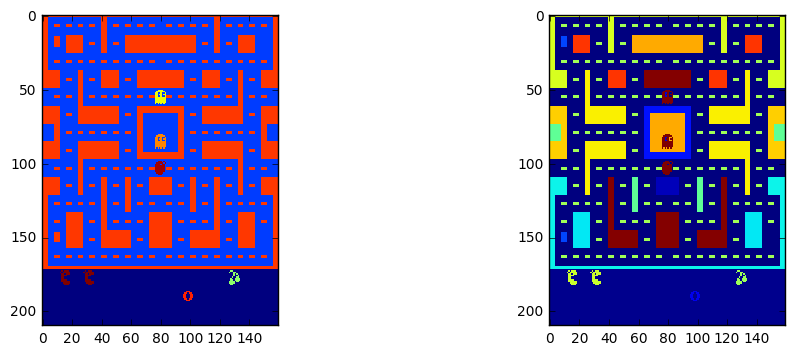

Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
Not found class for object
N

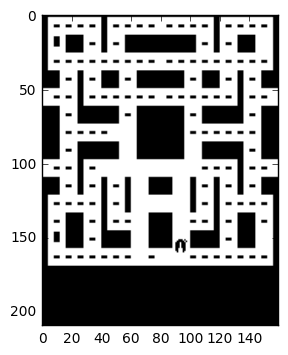

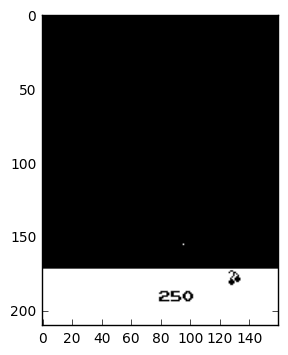

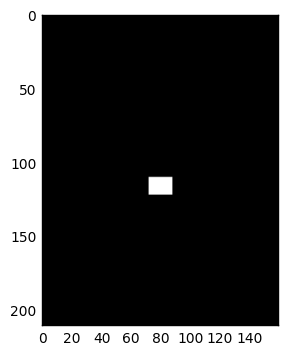

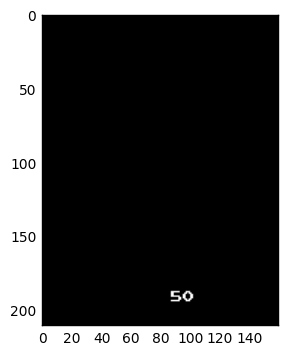

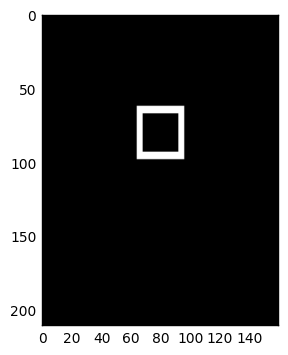

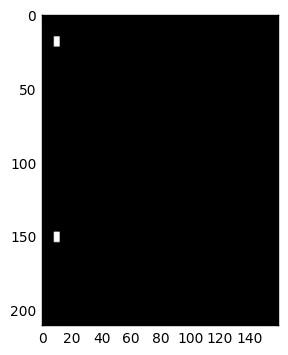

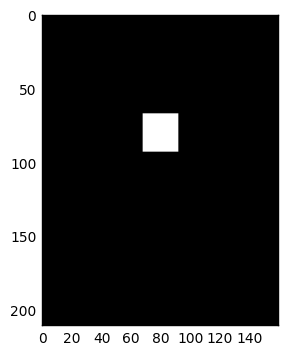

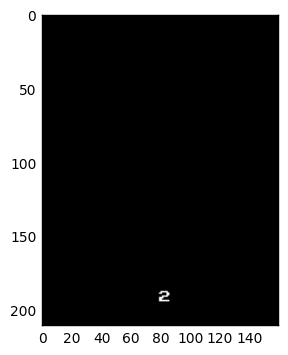

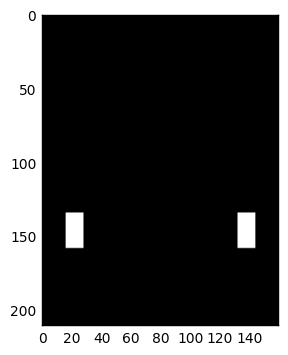

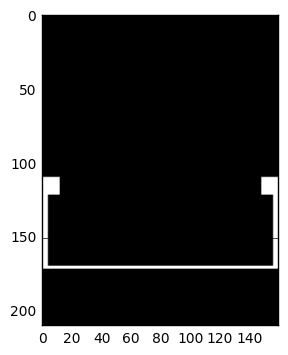

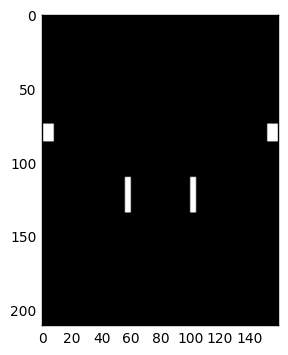

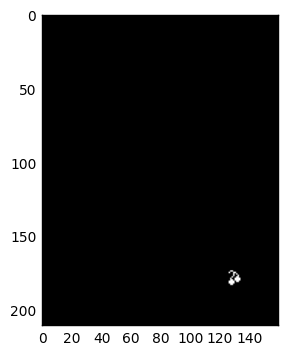

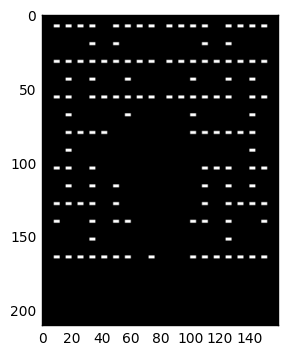

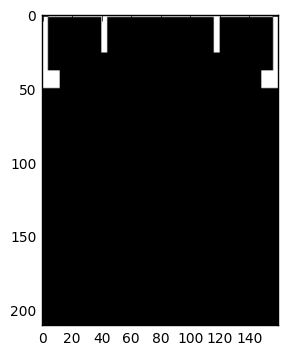

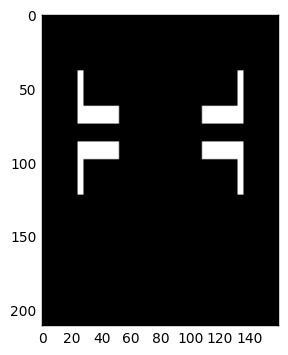

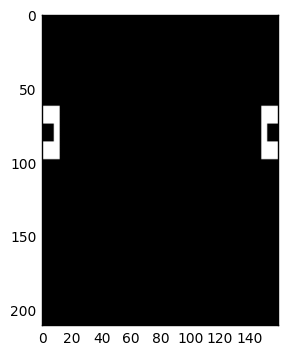

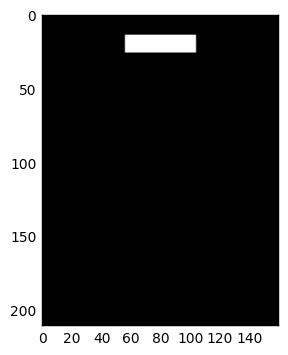

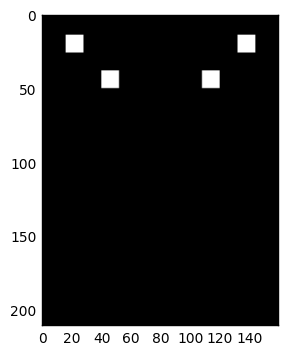

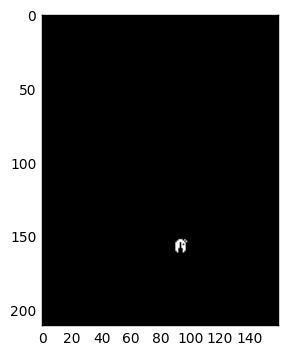

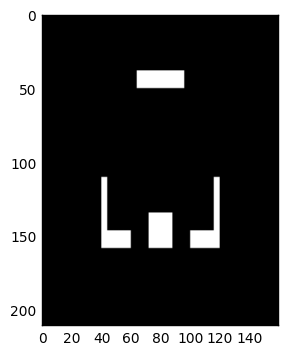

In [9]:
import random
obs, s = random.sample(list(zip(sample_observations, sample_simplified)), 1)[0]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(s[:, :, 0], interpolation='Nearest')
axes[1].imshow(obs, interpolation='Nearest')
plt.show()
odf.get_simple_image(obs)
for i in np.unique(new_im):
    plt.imshow(new_im == i, cmap='gray')
    plt.show()

In [17]:
# Генерим картинку
#image = env.ale.getScreenGrayscale()
# Создаем новый вектор признаков
#new_features = odf.get_distance_features(image)

In [18]:
# Генерим картинку
env.reset()
image = env.ale.getScreenGrayscale()
# Делаем упрощение
new_im = odf.get_simple_image(image[:, :, 0])

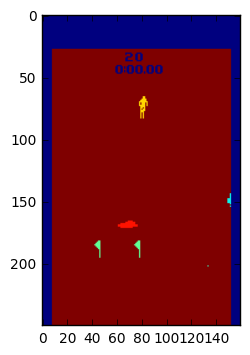

In [19]:
plt.imshow(image[:, :, 0])
plt.show()

0


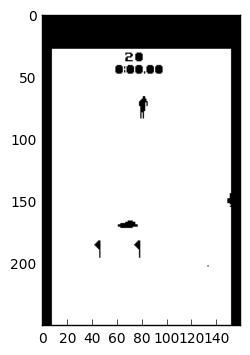

15


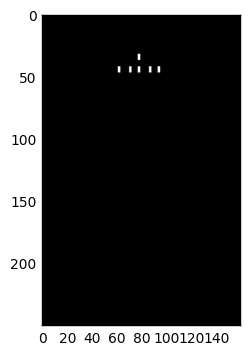

16


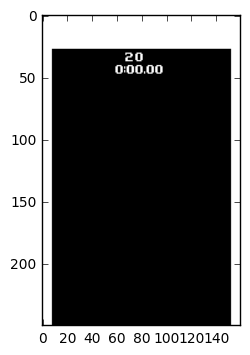

116


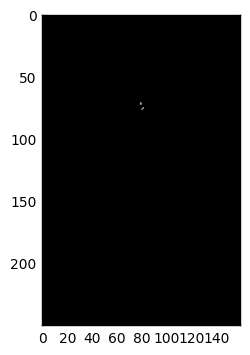

130


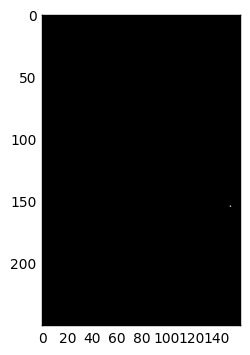

195


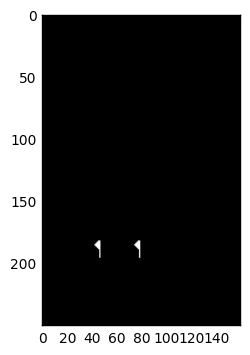

210


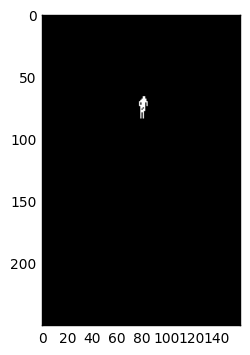

218


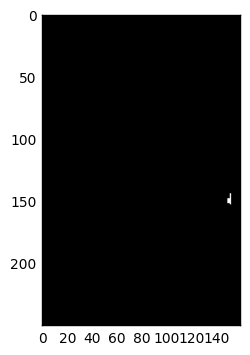

233


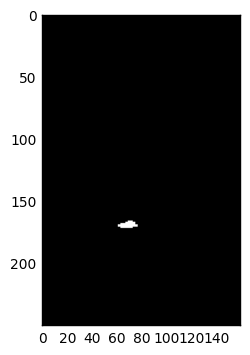

239


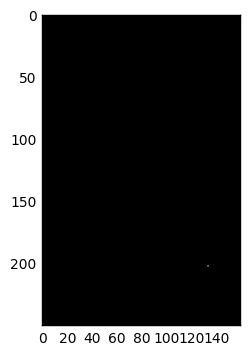

In [20]:
for i in np.unique(new_im):
    print(i)
    plt.imshow(new_im == i, cmap='gray')
    plt.show()

In [21]:
print(np.unique(new_im))

[  0  15  16 116 130 195 210 218 233 239]


In [22]:
for (C, S), i in odf.colors_classes.items():
    print(C, S, i)

116 26.0 242
86 87.0 105
116 21.0 2
64 51.0 3
86 90.0 4
124 143.2 28
64 105.0 184
210 61.5 244
64 39.0 57
64 222.5 63
98 79.0 245
210 35.0 243
182 1.0 9
86 35.0 246
110 28.0 247
161 54.0 11
86 184.0 66
110 19.0 12
86 5.0 248
110 6.0 249
98 45.0 17
86 146.0 251
64 229.25 18
86 8.0 20
124 45.0 252
98 24.0 253
64 28.0 213
98 76.0 61
98 7.0 23
236 18.0 389
86 198.222222222 60
64 20.0 26
124 156.0 80
64 7.0 256
210 26.0 257
64 177.0 29
116 28.0 30
64 10.0 31
64 90.0 111
161 11.0 350
182 24.0 32
124 200.666666667 72
182 15.0 260
110 26.0 34
182 53.5 65
98 57.0 261
110 4.0 305
86 28.0 262
110 9.0 263
124 57.0 38
161 33.0 39
86 3.0 40
64 117.5 42
124 23.0 44
161 27.0 46
98 198.428571429 5
124 2.0 268
98 13.0 269
236 10.0 271
86 97.0 272
124 134.0 49
116 27.0 51
110 16.0 277
64 1.0 52
64 187.0 170
98 65.0 274
210 58.0 59
98 63.0 69
64 23.0 328
182 6.0 275
124 90.0 62
110 29.0 64
64 198.166666667 33
98 166.5 67
86 23.0 276
182 56.0 278
161 58.5 68
182 47.0 73
86 26.0 70
110 7.0 71
64 76.0 74
86 